# 선형 회귀 (Linear Regression)

### 공부시간에 따른 시험 점수

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv('LinearRegressionData.csv') # csv를 pandas로 읽어서 dataset에 저장

In [5]:
dataset.head() # dataset의 앞부분을 확인

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [6]:
X = dataset.iloc[:, :-1].values #처음부터 마지막 컬럼 직전까지의 데이터 {독립변수 - 원인} 
                                #*왜 0으로 안하고 :-1로 적는지? -> 행렬 구조 때문에
y = dataset.iloc[:, -1].values #마지막 컬럼 데이터 {종속변수 - 결과}

In [7]:
X, y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64))

In [8]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() # 선형회귀 객체 생성 -> reg 변수는 선형회귀변수가 된 것
reg.fit(X, y) # 학습 [선형회귀 모델 생성] -> reg에 X와 y를 학습 시킨 것, 1차 함수가 생긴다

LinearRegression()

In [9]:
y_pred = reg.predict(X) # 1차 함수에 X의 값을 넣었을때의 대응하는 y값을 y_pred에 저장 
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

<function matplotlib.pyplot.show(close=None, block=None)>

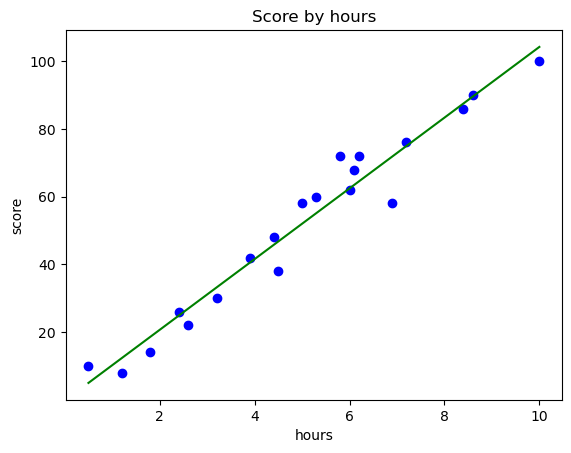

In [10]:
plt.scatter(X, y, color='blue') # X와 y의 대응하는 위치에 점, 실제값을 의미
plt.plot(X, y_pred, color='green') # X와 y_pred에 대응하는 즉 선형회귀의 1차함수, 예측값을 의미
                                   # 1차함수여서 X의 값이 뛰엄뛰엄 있어도 안끊겨 보이는 것
plt.title('Score by hours') # 그래프의 제목
plt.xlabel('hours') # X축 이름
plt.ylabel('score') # Y축 이름
plt.show # 그래프 출력

In [11]:
print('9시간 공부했을 때 예상 점수 : ', reg.predict([[9]])) # 위의 변수 X처럼 2차원 배열로 써야하므로 대괄호 2개

9시간 공부했을 때 예상 점수 :  [93.77478776]


In [12]:
reg.coef_ # 기울기 (m)

array([10.44369694])

In [13]:
reg.intercept_ # y절편 (b)

-0.218484702867201

y = mx + b -> y = 10.4436x - 0.2184 -> 선형회귀로 학습을 하여 찾은 최적의 1차함수

### 선형 회귀 정리
1. csv파일로부터 데이터를 import 함
2. 독립 변수(X)와 종속 변수(y)로 분리
3. 선형 회쉬를 import 하고 fit 함수를 통해 선형 회귀 모델 생성
4. predict 함수를 통해 fit으로 만든 직선그래프에 X값을 넣었을때의 y값을 구함
   만약 X의 자리에 [[9]]를 넣는다면 직선그래프에 9를 넣었을때의 y값을 구함

### 데이터 세트 분리

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
dataset = pd.read_csv('LinearRegressionData.csv')
dataset

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22
5,3.2,30
6,3.9,42
7,4.4,48
8,4.5,38
9,5.0,58


In [19]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [20]:
from sklearn.model_selection import train_test_split # train 세트와 test 세트로 분리할 수 있게 해준다
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 
# test_size값 0.2로 test data의 범위를 전체 데이터의 20%로 설정

In [21]:
X, len(X) # 전체 데이터 X, 개수

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [22]:
X_train, len(X_train) #훈련 세트 X, 개수

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [23]:
X_test, len(X_test) #테스트 세트 X, 개수

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [24]:
y, len(y) # 전체 데이터 y, 개수

(array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64),
 20)

In [25]:
y_train, len(y_train) #훈련 세트 y, 개수

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62],
       dtype=int64),
 16)

In [26]:
y_test, len(y_test) #테스트 세트 y, 개수

(array([ 90,   8, 100,  38], dtype=int64), 4)

### 분리된 데이터를 통한 모델링

In [28]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [29]:
reg.fit(X_train, y_train) # 훈련 세트로 학습 -> X, y로 학습한것과는 다른 1차함수가 생김

LinearRegression()

### 데이터 시각화 (훈련 세트)

<function matplotlib.pyplot.show(close=None, block=None)>

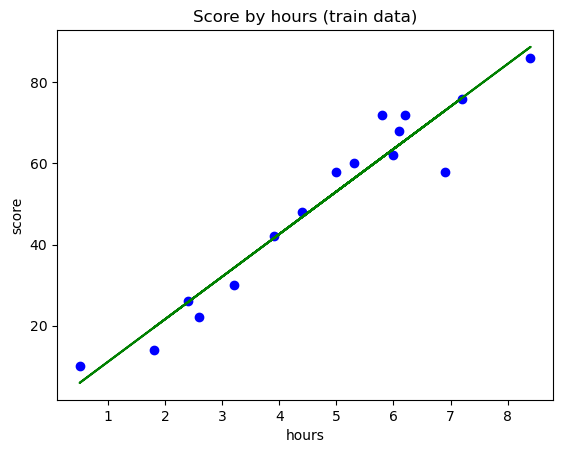

In [31]:
plt.scatter(X_train, y_train, color='blue') # 산점도(훈련 세트의 값들만 이용하여)
plt.plot(X_train, reg.predict(X_train), color='green') # 1차함수(훈련 세트의 값들만 이용하여)
plt.title('Score by hours (train data)') # 그래프의 제목
plt.xlabel('hours') # X축 이름
plt.ylabel('score') # Y축 이름
plt.show # 그래프 출력

### 데이터 시각화 (테스트 세트)

<function matplotlib.pyplot.show(close=None, block=None)>

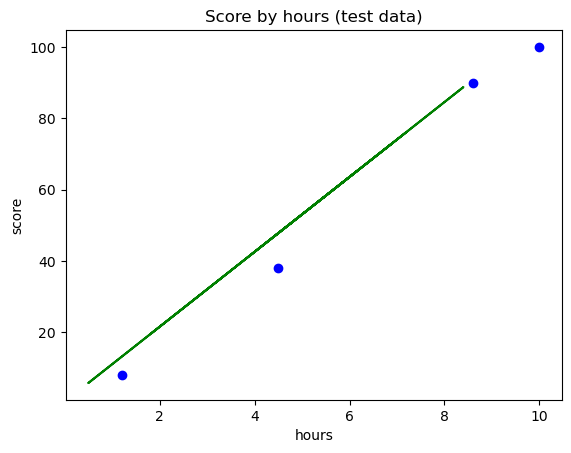

In [33]:
plt.scatter(X_test, y_test, color='blue') # 산점도(테스트 세트의 값들만 이용하여)
plt.plot(X_train, reg.predict(X_train), color='green') # 선 그래프(훈련 세트의 값들만 이용하여)
plt.title('Score by hours (test data)') # 그래프의 제목
plt.xlabel('hours') # X축 이름
plt.ylabel('score') # Y축 이름
plt.show # 그래프 출력

In [34]:
reg.coef_ # 훈련 세트로만 만들어진 1차함수의 기울기

array([10.49161294])

In [35]:
reg.intercept_ # 훈련 세트로만 만들어진 1차함수의 y절편

0.6115562905169796

### 모델 평가
- 잔차 제곱의 합(RSS)로 평가
- RSS를 최소로 만드는 공식이 최소제곱법(OLS)
- RSS는 노이즈(전체적인 패턴에 어긋난 이상값)에 취약하다
- 독립변수가 많아지면 구조가 복잡해짐
- 여기서 테스트 세트가 더 점수가 높은 이유는 데이터가 적기 때문에

In [37]:
reg.score(X_test, y_test) # 테스트 세트를 통한 모델 평가

0.9727616474310156

In [38]:
reg.score(X_train, y_train) # 훈련 세트를 통한 모델 평가

0.9356663661221668

### 데이터 세트 분리 정리
1. 데이터를 훈련 세트와 테스트 세트로 분리
2. 분리된 데이터를 통해 모델 생성
3. 데이터 시각화
4. 모델 평가

### 경사 하강법 (Gradient Descent)
- 최적의 기울기(평지)를 찾는 것, 기울기와 기울기의 최소 loss를 그래프로 그리면 2차방정식 형태가 나옴 -> loss가 가장 작은값 주변은 loss가 더 클것이므로
- 학습률(보폭)을 설정하여 처음 있었던 곳에서 최적의 기울기(평지) 쪽으로 이동하여 찾는 방식
- 학습률(보폭)이 크면 최적의 기울기(평지)를 넘어가서 발산하는 형태로 갈 수 있음
- 학습률(보폭)이 작으면 최적의 기울기(평지)를 찾기 전에 실행이 끝날 수 있음
- 일반적으로 학습률은 0.001, 0.003, 0.01, 0.03, 0.1, 0.3이 사용됨
- 에포크 : 최적의 값을 찾기 위해 훈련 세트의 모든 데이터를 사용해보는 것
- 경사하강법이 이해가 안되면 강의 1:05:10의 링크 참고 

max_iter : 훈련 세트 반복 횟수 (Epoch 횟수)

eta0 : 학습률 (learning rate) -> 보폭을 의미

In [42]:
from sklearn.linear_model import SGDRegressor # SGD(Stochastic Gradient Descent) : 확률적 경사 하강법
sr = SGDRegressor(max_iter=1000, eta0=1e-4, random_state=0) # verbose=1은 바뀌는 기울기를 확인할 수 있는것
# sr = SGDRegressor() # 디폴트값 사용
sr.fit(X_train, y_train)

SGDRegressor(eta0=0.0001, random_state=0)

<function matplotlib.pyplot.show(close=None, block=None)>

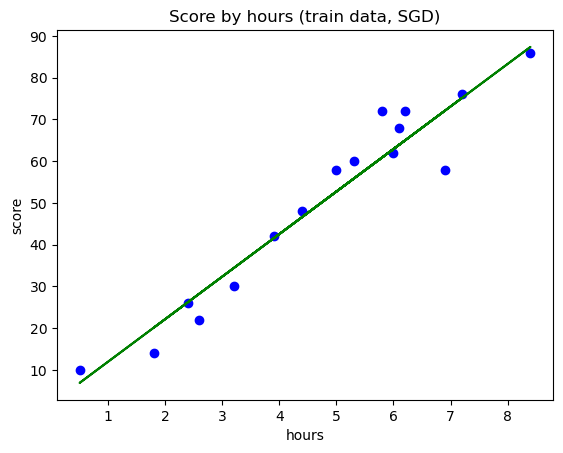

In [43]:
plt.scatter(X_train, y_train, color='blue') # 훈련 세트로만 산점도를 생성
plt.plot(X_train, sr.predict(X_train), color='green') # 선 그래프(훈련 세트의 값들만 이용하여)
plt.title('Score by hours (train data, SGD)') # 그래프의 제목
plt.xlabel('hours') # X축 이름
plt.ylabel('score') # Y축 이름
plt.show # 그래프 출력

In [44]:
sr.coef_, sr.intercept_

(array([10.19197471]), array([1.77603038]))

In [45]:
sr.score(X_test, y_test) # 테스트 세트를 통한 모델 평가 

0.9748430825252619

In [46]:
sr.score(X_train, y_train) # 훈련 세트를 통한 모델 평가 

0.9347804758954794